# Novelty detection for credit card customers using Isolation Forest

In this project I wrote a code for **anomaly detection** in a credit card dataset from Kaggle.com. The dataset consisted of anonymized credit card transactions labeled as fraudulent or genuine.  
I used the **novelty detection method**, where the training set only had examples with class=0, to identify unusual patterns that do not conform to expected behavior. To implement this, I used the **Isolation Forest model**, which is a type of unsupervised machine learning algorithm that is used for anomaly detection.  
Finally, I used **Grid search** to tune the parameters, which allowed me to find the best combination of hyperparameters for the model.  
Anomaly detection is important in many applications, including detecting fraud in bank transactions, catching defects in manufacturing products, or even detecting network intrusions. In the context of credit card fraud detection, fraudulent transactions are rare compared to authentic transactions, so identifying these anomalies can be challenging. The approach I used, which involves detecting anomalies in a set of only negative examples, can be effective in identifying fraudulent transactions.  
Data address:
https://www.kaggle.com/datasets/whenamancodes/fraud-detection?select=creditcard.csv

# 1-Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# 2-Load the dataset

In [2]:
data_creditcard=pd.read_csv ('creditcard.csv')

# 3-Exploratory data analysis

In [3]:
data_creditcard.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


The credit card dataset contains the following variables:

1. "Time": This variable indicates the time interval between each transaction and the first transaction in seconds.

2. "V1-V28": These are anonymized variables representing the output of Principal Component Analysis (PCA) transformation.

3. "Amount": This variable represents the amount of the transaction.

4. "Class": This is the target variable representing whether the transaction is genuine (Class 0) or fraudulent (Class 1).

In [4]:
data_creditcard.describe().applymap(lambda x: f"{x:0.4f}")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,...,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,...,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,...,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,...,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,...,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,...,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,...,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [5]:
# Check for class distribution
data_creditcard['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

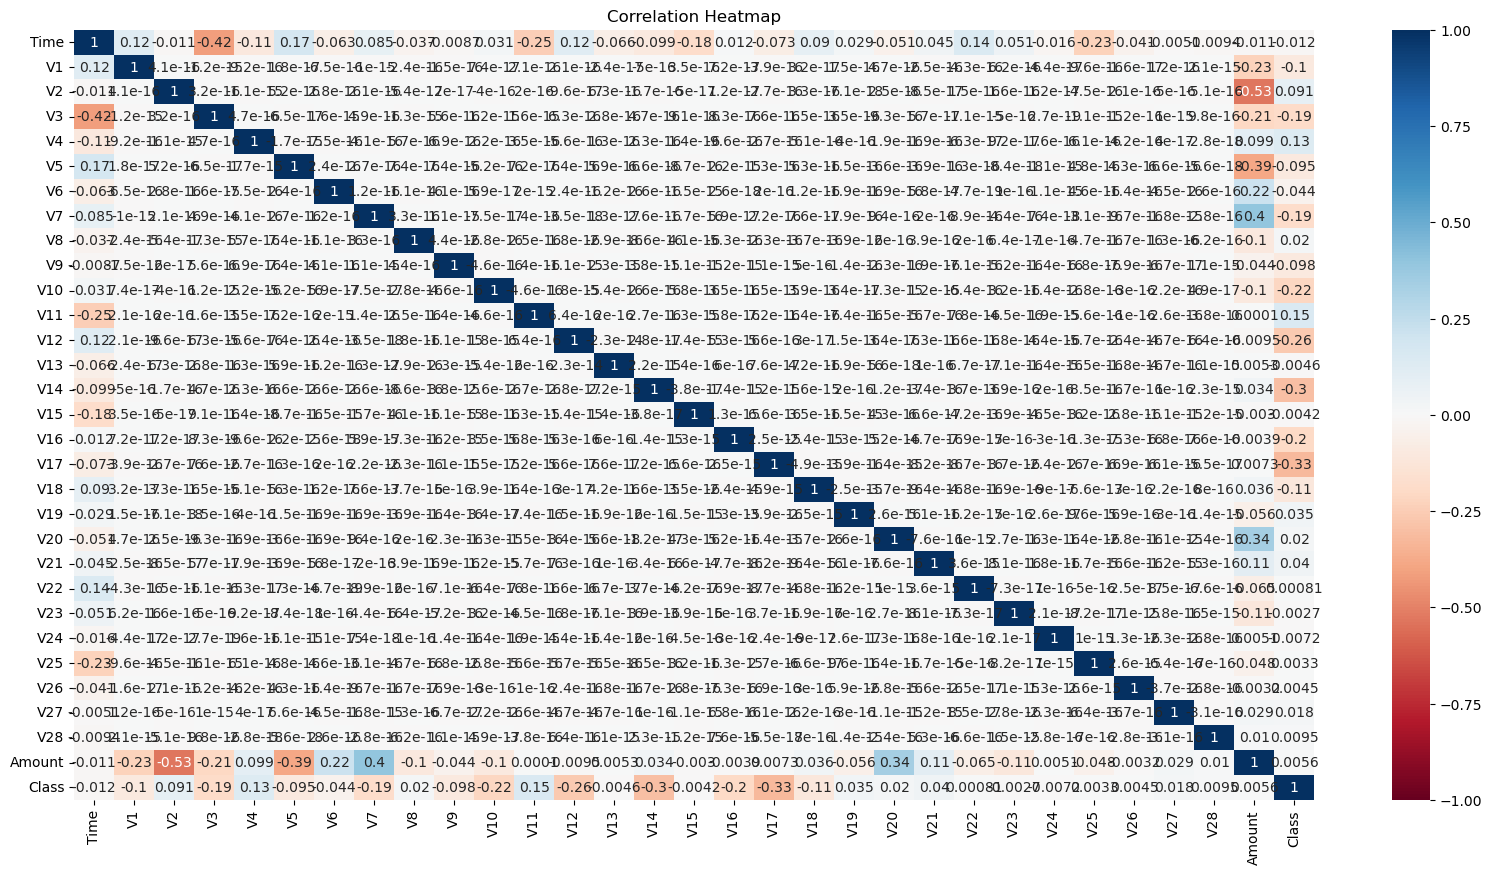

In [6]:
# Correlation matrix heatmap
plt.figure(figsize=(20,10))
Vis=sns.heatmap(data_creditcard.corr(), annot=True, cmap='RdBu',vmin=-1, vmax=1)
Vis.set_yticklabels(Vis.get_yticklabels(),rotation=0,fontsize=10)
Vis.set_xticklabels(Vis.get_xticklabels(),rotation=90,fontsize=10)
plt.title ('Correlation Heatmap')
plt.show ()

We can see that the variables V1 to V28 do not have a high correlation with each other because these variables were obtained using PCA and using this method the variables are as different from each other as possible. However, **the Amount variable** has a high absolute correlation with V2, V5, and V7, and **the class variable** also has a relatively higher correlation with V10, V12, V14, and V17 variables (negative correlation).

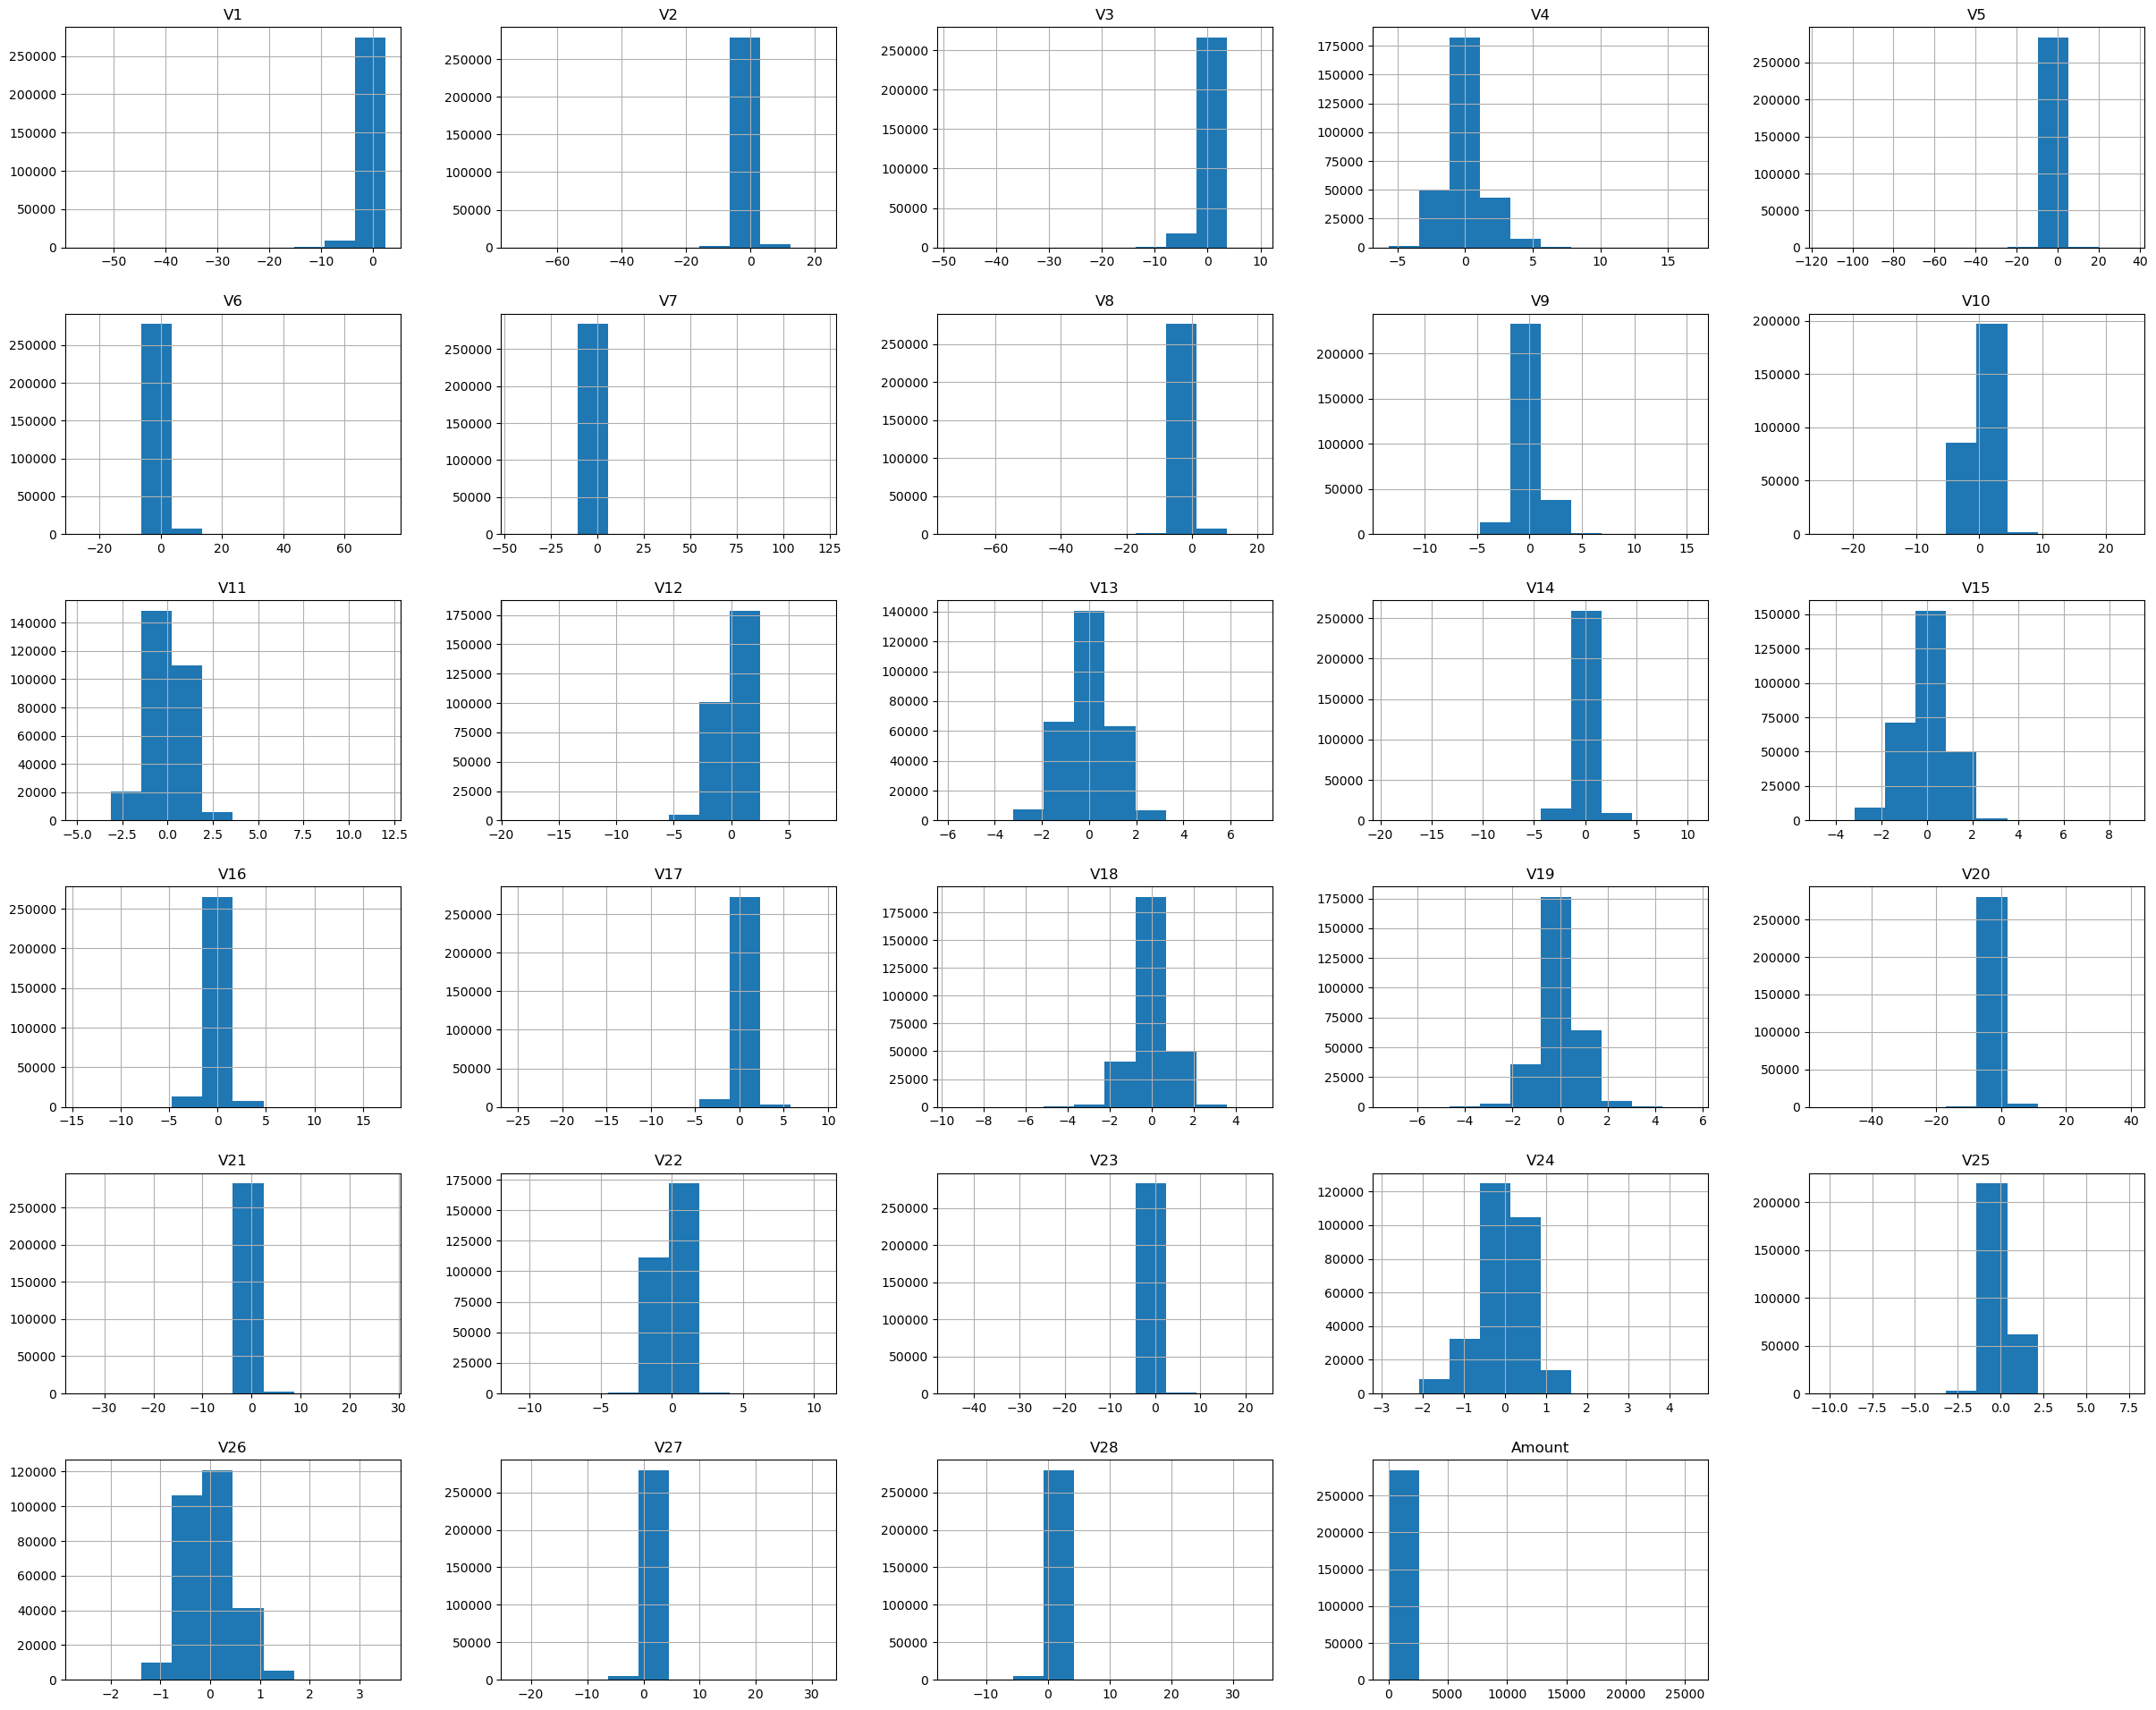

In [7]:
_=data_creditcard.iloc[:,1:-1].hist(bins=10, figsize=(30, 24))

As can be seen from the graph, most of the variables **are not symmetrical** and have right or left skewness.

# 4-Data preprocessing

## 4-1-checking missing data

In [8]:
data_creditcard.isnull().sum().sum()

0

There is not any missing data in our dataset.

## 4-2-shuffling

**The time variable** here has no special explanatory value for us, so we can delete its column. However, considering that the transactions are in chronological order and this may harm the analysis, we **shuffle the data**. This data should be distributed as randomly as possible.

In [9]:
data_creditcard_s = data_creditcard.sample(frac=1).reset_index(drop=True)

## 4-3-splitting the dataset into features and labels

In [10]:
data_creditcard_s.drop (['Time'], axis=1, inplace=True)

In [11]:
X_input = data_creditcard_s.drop(['Class'], axis=1)
y = data_creditcard_s['Class']

## 4-4-splitting the dataset into train, validation and test sets

In the context of unsupervised learning for anomaly detection, it is assumed that the training set only has non-anomalous examples, or a very small fraction of anomalous examples. However, the validation and test sets may have both non-anomalies and anomalies. Anomaly detection is the task of classifying test data that differ in some respect from the data that are available during training. Some based on this knowledge, we split the dataset into three sets: Train, Validation and Test

In [12]:
# Separate the examples with class=0 from the examples with class=1
X_input_0 = X_input[data_creditcard_s['Class'] == 0]
X_input_1 = X_input[data_creditcard_s['Class'] == 1]

In [13]:
# Split the data into a train set and a combined validation/test set
X_train, X_val_test, y_train, y_val_test = train_test_split(X_input_0, np.zeros(X_input_0.shape[0]), test_size=0.3,\
                                                            random_state=42, stratify=np.zeros(X_input_0.shape[0]))

In [14]:
# Combine the examples with class=1 with the validation/test set
X_val_test = np.concatenate([X_val_test, X_input_1], axis=0)
y_val_test = np.concatenate([y_val_test, np.ones(X_input_1.shape[0], dtype=np.int32)], axis=0)

In [15]:
# Split the validation/test set into separate validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42, stratify=y_val_test)

In [16]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(199020, 29)
(42893, 29)
(42894, 29)
(199020,)
(42893,)
(42894,)


In [17]:
#number of anomalies in validation and test sets
n_val_1 = np.count_nonzero(y_val == 1)
n_test_1 = np.count_nonzero(y_test == 1)
print(f"Number of class=1 examples in validation set: {n_val_1}")
print(f"Number of class=1 examples in test set: {n_test_1}")

Number of class=1 examples in validation set: 246
Number of class=1 examples in test set: 246


Here we create train, validation and test datasets as Pandas dataframe

In [18]:
y_train = y_train.reshape(-1, 1)
merged_train = np.concatenate((X_train, y_train), axis=1)
train_set= pd.DataFrame(merged_train)
train_set.set_axis(data_creditcard_s.columns, axis=1, inplace=True)

In [19]:
y_val = y_val.reshape(-1, 1)
merged_val = np.concatenate((X_val, y_val), axis=1)
val_set= pd.DataFrame(merged_val)
val_set.set_axis(data_creditcard_s.columns, axis=1, inplace=True)

In [20]:
y_test = y_test.reshape(-1, 1)
merged_test = np.concatenate((X_test, y_test), axis=1)
test_set= pd.DataFrame(merged_test)
test_set.set_axis(data_creditcard_s.columns, axis=1, inplace=True)

# 4-5-scaling the features

In [21]:
# Create a StandardScaler object
sc = StandardScaler()

# Scale the training, validation, and test data
x_train_scaled = sc.fit_transform (train_set.drop('Class', axis=1))
x_val_scaled = sc.transform (val_set.drop('Class', axis=1))
x_test_scaled = sc.transform (test_set.drop('Class', axis=1))

# 5-Anomaly detection with Isolation Forest

In the below code, **The function evaluate_model** takes an Isolation Forest model (iforest) and three datasets (train_set, val_set, and test_set) as input. The function first fits the Isolation Forest model on the training set by dropping the Class column. It then creates a list of thresholds and iterates over them to find the **best threshold** that maximizes the F1 score on the validation set. The function then predicts the labels for the test set and computes the F1 score, confusion matrix, and classification report using the best threshold. Finally, the function returns the predicted labels for the test set, the best threshold, the best F1 score, and the anomaly scores for the test set.  
**The GridSearchCV function** is used to perform **hyperparameter tuning** on the Isolation Forest model. The hyperparameters that are tuned are the number of trees (n_estimators) and the maximum number of samples used to build each tree (max_samples).

In [22]:
def evaluate_model(iforest, train_set, val_set, test_set):
    # fitting the Isolation Forest model on the training set
    iforest.fit(train_set.drop('Class', axis=1))

    #initializing a list of thresholds and setting the initial values of best_threshold and best_f_score
    thresholds = [i/300 for i in range(1, 300)]

    best_threshold = None
    best_f_score = 0

    # iterating over the list of thresholds determining the best threshold
    for threshold in thresholds:
        y_pred = iforest.predict(val_set.drop('Class', axis=1))
        y_pred = (y_pred < threshold).astype(int)
        f_score = f1_score(val_set['Class'], y_pred)

        if f_score > best_f_score:
            best_threshold = threshold
            best_f_score = f_score

    #predicting the labels of the test set and converting them to binary
    y_pred_test = iforest.predict(test_set.drop('Class', axis=1))
    y_pred_test = (y_pred_test < best_threshold).astype(int)
    
    #printing the best threshold, the best F1 score, the confusion matrix, and the classification report
    print ("Best Threshold: ", best_threshold)
    print ("best f1_score: {:.4f}".format(best_f_score))

    print(confusion_matrix(test_set['Class'], y_pred_test))
    print(classification_report(test_set['Class'], y_pred_test))

    #Returning the needed values
    test_scores = iforest.score_samples(test_set.drop('Class', axis=1))
    return y_pred_test, best_threshold, best_f_score, test_scores

# Set the random seed to a fixed value
random.seed(42)

#Calculating the best hyperparameters by the grid search
param_grid = {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 0.7, 0.9]}
grid = GridSearchCV(IsolationForest(random_state=42), param_grid, scoring="roc_auc", cv=5)
y_pred_test, best_threshold, best_f_score, test_scores= evaluate_model(grid, train_set, val_set, test_set)
print ("Best hyperparameters:", grid.best_params_ )

Best Threshold:  0.0033333333333333335
best f1_score: 0.5368
[[42485   163]
 [   90   156]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42648
         1.0       0.49      0.63      0.55       246

    accuracy                           0.99     42894
   macro avg       0.74      0.82      0.77     42894
weighted avg       0.99      0.99      0.99     42894

Best hyperparameters: {'max_samples': 0.5, 'n_estimators': 10}


The confusion matrix shows that out of 42744 transactions, **42485** were correctly classified as non-fraudulent and **156** were correctly classified as fraudulent. However, **163** non-fraudulent transactions were classified as fraudulent and **90** fraudulent transactions were classified as non-fraudulent. The precision, recall, and F1-score for the fraudulent class were 0.49, 0.63, and 0.55 respectively.

## Visualising Actual vs. Predicted Class Labels

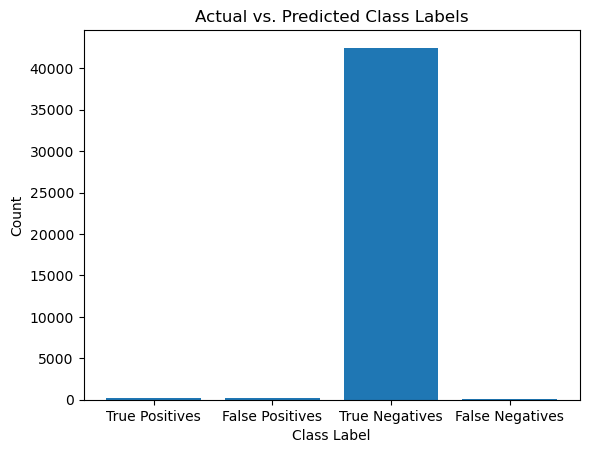

In [23]:
# Assuming 'test_set' contains the actual class labels and predicted labels
actual = test_set['Class']
predicted = y_pred_test

# Count the number of true positives, false positives, true negatives, and false negatives
tp = sum((actual == 1) & (predicted == 1))
fp = sum((actual == 0) & (predicted == 1))
tn = sum((actual == 0) & (predicted == 0))
fn = sum((actual == 1) & (predicted == 0))

# Create a bar chart to visualize the counts
labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
counts = [tp, fp, tn, fn]
plt.bar(labels, counts)

# Add titles and labels
plt.title('Actual vs. Predicted Class Labels')
plt.xlabel('Class Label')
plt.ylabel('Count')

# Show the chart
plt.show()

# 6-summary and potential innovations

**Anomaly detection** is the process of identifying unexpected items or events in data sets that differ from the normal and it is often applied on unlabeled data which is known as unsupervised anomaly detection. Credit card fraud detection is one of the most important applications of anomaly detection.  
This project aimed to detect credit card fraud using the Isolation Forest algorithm. The model achieved a best threshold of 0.0033 and a best F1-score of 0.5368. The confusion matrix showed that out of 42744 transactions, 42485 were correctly classified as non-fraudulent and 156 were correctly classified as fraudulent. However, 163 non-fraudulent transactions were classified as fraudulent and 90 fraudulent transactions were classified as non-fraudulent. The precision, recall, and F1-score for the fraudulent class were 0.49, 0.63, and 0.55 respectively. The accuracy of the model was 0.99. The weighted average of precision, recall, and F1-score was 0.99, 0.99, and 0.99 respectively.  
Some **potential improvements** for the project are:
* Using **other anomaly detection algorithms** such as Local Outlier Factor (LOF).
* Using **a larger dataset** to improve the accuracy of the model
* Using **feature engineering** to improve the performance of the model (Here, because the data are obtained based on the PCA model and cannot be given a specific interpretation, feature engineering is difficult)
* Using **ensemble methods** to combine multiple models for better performance
* Using **deep learning models** such as autoencoders for anomaly detection